# Unsupervised Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [55]:
# beer dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns


url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'

How would you cluster these beers?

The obvious is alcohol vs calories (more alcohol = more calories) or alcohol vs price (more alcohol = higher price), although the latter may make less sense in the real world (?)...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bf77160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12c8cff98>]], dtype=object)

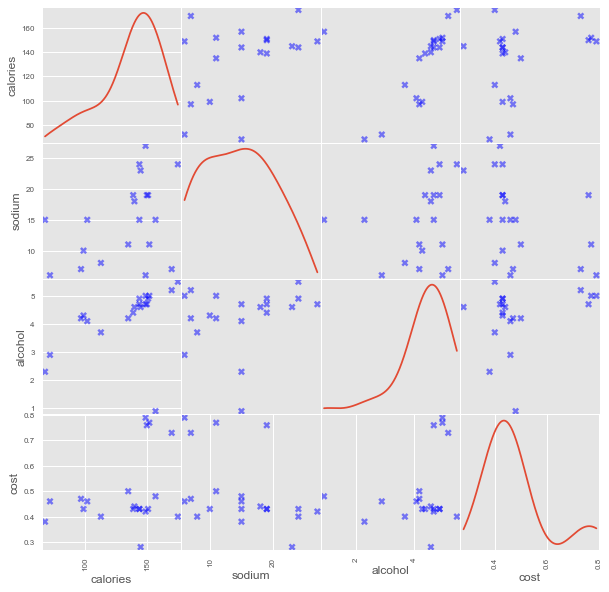

In [56]:
# define X and remove label
#X = pd.read_csv(url, sep=' ', header=None, index_col=0)
X = pd.read_csv(url, sep=' ')
# print(X.dtypes)
# print (X)


scatter_matrix(X, alpha=0.5, figsize=(10, 10), diagonal='kde', grid=True, c="blue", marker="X") 



What happened to y?

What "y"?

## Part 1: K-means clustering

In [57]:
# review the cluster labels
# print (X)
X = X.loc[:, ['calories' , 'sodium', 'alcohol', 'cost']]
print (X)



    calories  sodium  alcohol  cost
0        144      15      4.7  0.43
1        151      19      4.9  0.43
2        157      15      0.9  0.48
3        170       7      5.2  0.73
4        152      11      5.0  0.77
5        145      23      4.6  0.28
6        175      24      5.5  0.40
7        149      27      4.7  0.42
8         99      10      4.3  0.43
9        113       8      3.7  0.40
10       140      18      4.6  0.44
11       102      15      4.1  0.46
12       135      11      4.2  0.50
13       150      19      4.7  0.76
14       149       6      5.0  0.79
15        68      15      2.3  0.38
16       139      19      4.4  0.43
17       144      24      4.9  0.43
18        72       6      2.9  0.46
19        97       7      4.2  0.47


In [58]:
# K-means with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)





KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
# save the cluster labels and sort by cluster

labels = kmeans.labels_
print (labels)
X["labels"] = labels
X.sort_values(by='labels', ascending=1, inplace=True)
print (X)


[0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2]
    calories  sodium  alcohol  cost  labels
0        144      15      4.7  0.43       0
1        151      19      4.9  0.43       0
2        157      15      0.9  0.48       0
3        170       7      5.2  0.73       0
4        152      11      5.0  0.77       0
5        145      23      4.6  0.28       0
6        175      24      5.5  0.40       0
7        149      27      4.7  0.42       0
17       144      24      4.9  0.43       0
10       140      18      4.6  0.44       0
16       139      19      4.4  0.43       0
12       135      11      4.2  0.50       0
13       150      19      4.7  0.76       0
14       149       6      5.0  0.79       0
18        72       6      2.9  0.46       1
15        68      15      2.3  0.38       1
9        113       8      3.7  0.40       2
8         99      10      4.3  0.43       2
11       102      15      4.1  0.46       2
19        97       7      4.2  0.47       2


What do the clusters seem to be based on? Why?

Honestly, I don't see it...

In [60]:
# review the cluster centers
centroids = kmeans.cluster_centers_
print (centroids)

[[ 150.           17.            4.52142857    0.52071429]
 [  70.           10.5           2.6           0.42      ]
 [ 102.75         10.            4.075         0.44      ]]


In [61]:
# calculate the mean of each feature for each cluster

print (X)
for cluster_label in X['labels'].unique():
    print ("working on cluster_label: ", cluster_label)
    temp = X.loc[X['labels'] == cluster_label]
    temp = temp.iloc[:,0:4]
    for col in temp.columns:
        print ("Mean for " , col, " in cluster ", cluster_label, " is ", temp[col].mean())

    




    calories  sodium  alcohol  cost  labels
0        144      15      4.7  0.43       0
1        151      19      4.9  0.43       0
2        157      15      0.9  0.48       0
3        170       7      5.2  0.73       0
4        152      11      5.0  0.77       0
5        145      23      4.6  0.28       0
6        175      24      5.5  0.40       0
7        149      27      4.7  0.42       0
17       144      24      4.9  0.43       0
10       140      18      4.6  0.44       0
16       139      19      4.4  0.43       0
12       135      11      4.2  0.50       0
13       150      19      4.7  0.76       0
14       149       6      5.0  0.79       0
18        72       6      2.9  0.46       1
15        68      15      2.3  0.38       1
9        113       8      3.7  0.40       2
8         99      10      4.3  0.43       2
11       102      15      4.1  0.46       2
19        97       7      4.2  0.47       2
working on cluster_label:  0
Mean for  calories  in cluster  0  is  150.0
Me

In [62]:
# save the DataFrame of cluster centers
## I believe I have done this above

In [63]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [64]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

centeroids_cal_alc :
[[  70.            2.6       ]
 [ 150.            4.52142857]
 [ 102.75          4.075     ]]
<class 'numpy.ndarray'>
[[ 150.            4.52142857]
 [ 102.75          4.075     ]
 [  70.            2.6       ]]
working on cluster_label:  0 color is  red
working on cluster_label:  1 color is  green
working on cluster_label:  2 color is  blue


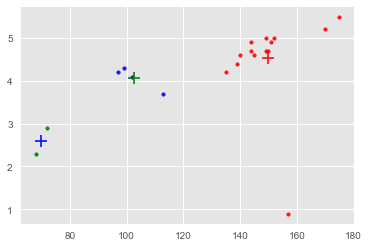

In [65]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
colors = (dict (enumerate (['red','green','blue'])))
fig = plt.figure()
ax = fig.add_subplot(111)
for cluster_label in X['labels'].unique():
    cal_alc = X.loc[X['labels'] == cluster_label]
    cal_alc = cal_alc.loc[:,['calories','alcohol']]
    ax.scatter(cal_alc['calories'],cal_alc['alcohol'], marker='.', alpha=0.9, color=colors[cluster_label])
    

# cluster centers, marked by "+"
cal_alc = X.loc[:,['calories','alcohol']]
kmeans_cal_alc = KMeans(n_clusters=3)
kmeans_cal_alc.fit(cal_alc)
centeroids_cal_alc = kmeans_cal_alc.cluster_centers_
#ax.scatter(centeroids_cal_alc[:,0],centeroids_cal_alc[:,1], marker='+', alpha=0.3, c=[1,2,3], s=50)
print ("centeroids_cal_alc :")
print (centeroids_cal_alc)
print (type(centeroids_cal_alc))
# since centeroids (kmeans_cal_alc.cluster_centers_) seem to have random order, sort them to help color coding
centeroids_cal_alc = np.sort(centeroids_cal_alc, axis=0)
# then need to flip it because I have it in opposite order
centeroids_cal_alc = np.flip (centeroids_cal_alc,0)
# OK - this last attempt is totally just an attempt - it works when it wants to ... cluster center colors 
# appear to match the actual cluster colors at random - something to look at more closely...

print (centeroids_cal_alc)
for cluster_label in X['labels'].unique():
    print ("working on cluster_label: ", cluster_label, "color is ", colors[cluster_label])
    ax.scatter(centeroids_cal_alc[cluster_label][0],centeroids_cal_alc[cluster_label][1],
               marker='+', alpha=0.9, color=colors[cluster_label], s=150)
   


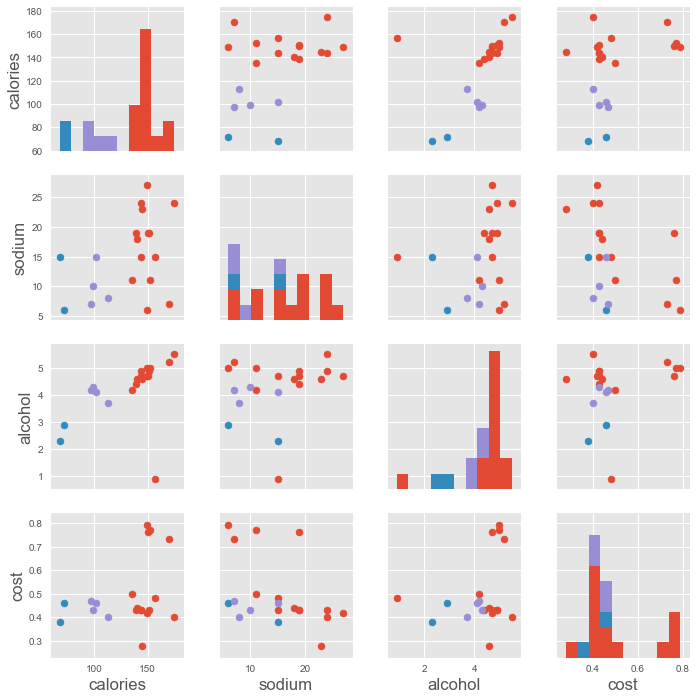

In [66]:
# scatter plot matrix (0=red, 1=green, 2=blue)

import seaborn as sns
g = sns.PairGrid(X, vars=["calories", "sodium" , "alcohol", "cost"], hue="labels")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
#g.add_legend()


### Repeat with scaled data

In [67]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaledX = X.loc[:,['calories', 'sodium', 'alcohol', 'cost']]
print (scaledX)
scaler = StandardScaler()
scaler.fit(scaledX)
scaledX = scaler.transform(scaledX)
scaledX = pd.DataFrame(scaledX, columns=['calories', 'sodium', 'alcohol', 'cost'])
print ("==============scaledX========================")
print (scaledX)
print ("===============scaledX mean=======================")
print (scaledX.mean())
print ("======================================")
print ("================scaledX variance======================")
print (scaledX.var())
print ("======================================")

    calories  sodium  alcohol  cost
0        144      15      4.7  0.43
1        151      19      4.9  0.43
2        157      15      0.9  0.48
3        170       7      5.2  0.73
4        152      11      5.0  0.77
5        145      23      4.6  0.28
6        175      24      5.5  0.40
7        149      27      4.7  0.42
17       144      24      4.9  0.43
10       140      18      4.6  0.44
16       139      19      4.4  0.43
12       135      11      4.2  0.50
13       150      19      4.7  0.76
14       149       6      5.0  0.79
18        72       6      2.9  0.46
15        68      15      2.3  0.38
9        113       8      3.7  0.40
8         99      10      4.3  0.43
11       102      15      4.1  0.46
19        97       7      4.2  0.47
==============scaledX========================
    calories    sodium   alcohol      cost
0   0.387913  0.007795  0.433808 -0.456830
1   0.625066  0.631369  0.622420 -0.456830
2   0.828339  0.007795 -3.149822 -0.102698
3   1.268765 -1.239354  0.

In [68]:
# K-means with 3 clusters on scaled data
kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(scaledX)
centeroids_scaled = kmeans_scaled.cluster_centers_


In [69]:
# save the cluster labels and sort by cluster
labels_scaled = kmeans_scaled.labels_
print (labels)

scaledX['labels'] = labels
print (scaledX.sort_values(by='labels', ascending=1))



[0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2]
    calories    sodium   alcohol      cost  labels
0   0.387913  0.007795  0.433808 -0.456830       0
1   0.625066  0.631369  0.622420 -0.456830       0
2   0.828339  0.007795 -3.149822 -0.102698       0
3   1.268765 -1.239354  0.905338  1.667960       0
4   0.658944 -0.615780  0.716726  1.951265       0
5   0.421792  1.254943  0.339502 -1.519224       0
6   1.438159  1.410837  1.188256 -0.669309       0
7   0.557308  1.878518  0.433808 -0.527656       0
17 -1.136637 -0.771673  0.056584 -0.456830       0
10  0.218519  0.631369  0.150890 -0.456830       0
16 -0.662332 -1.083460 -0.509253 -0.669309       0
12  0.591187  0.631369  0.433808  1.880438       0
13  0.557308 -1.395248  0.716726  2.092917       0
14 -2.051367 -1.395248 -1.263701 -0.244351       0
18 -1.035000  0.007795 -0.132028 -0.244351       1
15 -2.186883  0.007795 -1.829537 -0.810961       1
9   0.252398  0.475475  0.339502 -0.386003       2
8   0.387913  1.410837  0.622420 -0.4568

What are the "characteristics" of each cluster?

As shown below we scaled the dataframe to zero mean and unit variance, so now all the clusters' values are closer together centered around zero. This would be of help if we wanted to graph them all together to visualise the relationship between these clusters. Without scaling, the combined graph would emphasize 'calories' and make 'cost' nearly invisible because the values for 'calories' are so much larger than the values for 'cost'.

In [70]:
print ("==============scaledX========================")
print (scaledX)
print ("===============scaledX mean=======================")
print (scaledX.mean())
print ("======================================")
print ("================scaledX variance======================")
print (scaledX.var())
print ("======================================")

==============scaledX========================
    calories    sodium   alcohol      cost  labels
0   0.387913  0.007795  0.433808 -0.456830       0
1   0.625066  0.631369  0.622420 -0.456830       0
2   0.828339  0.007795 -3.149822 -0.102698       0
3   1.268765 -1.239354  0.905338  1.667960       0
4   0.658944 -0.615780  0.716726  1.951265       0
5   0.421792  1.254943  0.339502 -1.519224       0
6   1.438159  1.410837  1.188256 -0.669309       0
7   0.557308  1.878518  0.433808 -0.527656       0
8   0.387913  1.410837  0.622420 -0.456830       2
9   0.252398  0.475475  0.339502 -0.386003       2
10  0.218519  0.631369  0.150890 -0.456830       0
11  0.083003 -0.615780 -0.037722  0.038954       2
12  0.591187  0.631369  0.433808  1.880438       0
13  0.557308 -1.395248  0.716726  2.092917       0
14 -2.051367 -1.395248 -1.263701 -0.244351       0
15 -2.186883  0.007795 -1.829537 -0.810961       1
16 -0.662332 -1.083460 -0.509253 -0.669309       0
17 -1.136637 -0.771673  0.056584 -0.

In [71]:
# review the cluster centers
print (centeroids_scaled)

[[ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]


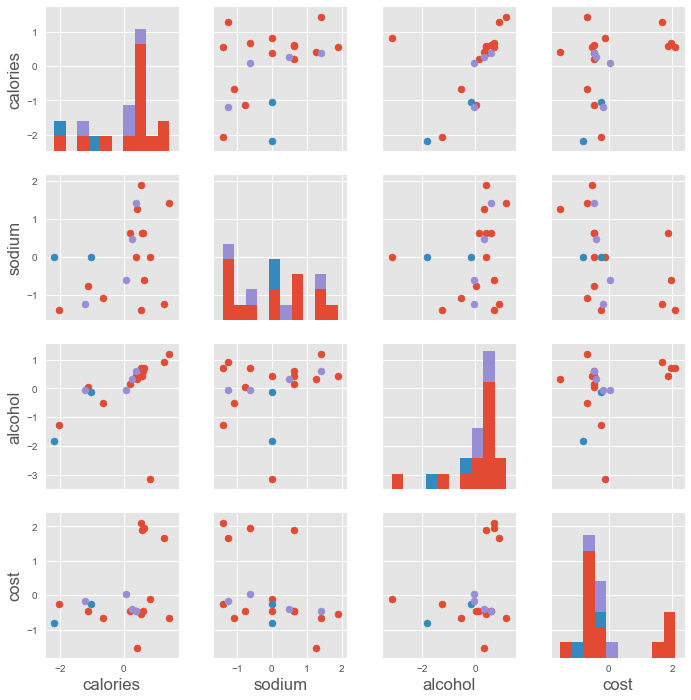

In [72]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
g = sns.PairGrid(scaledX, vars=["calories", "sodium" , "alcohol", "cost"], hue="labels")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
#g.add_legend()


Do you notice any cluster assignments that seem a bit odd? How might we explain those?

Yes, many. I did kmeans on the multi-dimensional matrix, these are graphed in 2-d, so we're looking at some flat views of a multi-dimensional scatter.

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [73]:
# calculate SC for K=3
from sklearn import metrics
scX = X
#print (scX)
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(scX)
labels = kmeans_model.labels_
SC = metrics.silhouette_score(scX, labels, metric='euclidean')
print (SC)

0.673489438157


In [74]:
# calculate SC for K=2 through K=19
SC = []
for i in range(0,18):
    kmeans_model = KMeans(n_clusters=i+2, random_state=1).fit(scX)
    labels = kmeans_model.labels_
    SC.append(metrics.silhouette_score(scX, labels, metric='euclidean'))
    print (SC[i])
    


0.691925880136
0.673489438157
0.585826232841
0.435651978409
0.456026772361
0.437869722639
0.38948243125
0.36588027479
0.391588797443
0.412845519818
0.345977523713
0.312214392484
0.307077821448
0.318345618391
0.284951400117
0.234980773331
0.15880910175
0.0842305138015


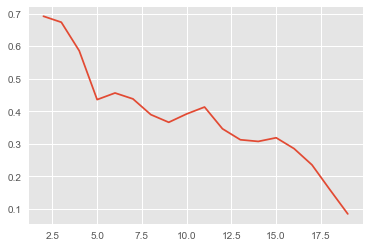

In [75]:
# plot the results
plt.plot(range(2,20),SC)


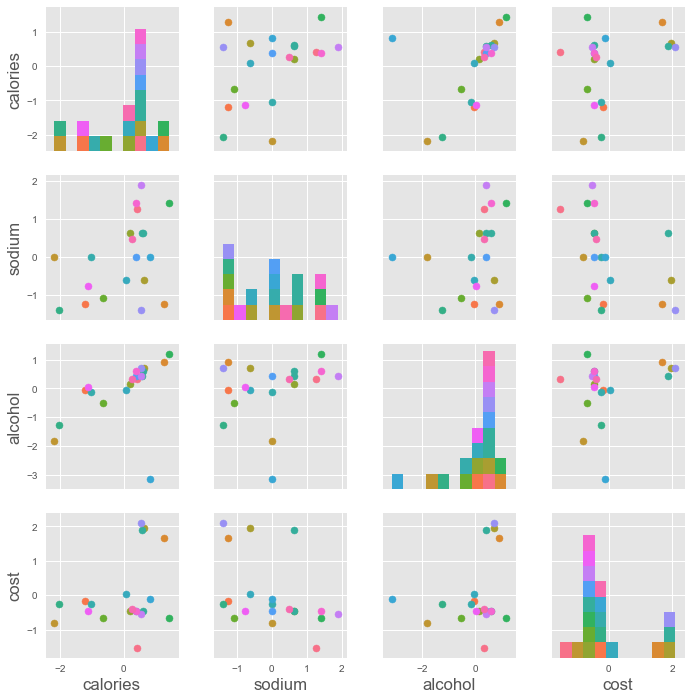

In [76]:
# K-means with 4 clusters on scaled data
#print (X)
scaledX = X.loc[:,['calories', 'sodium', 'alcohol', 'cost']]
#print (scaledX)
scaler = StandardScaler()
scaler.fit(scaledX)
scaledX = scaler.transform(scaledX)
scaledX = pd.DataFrame(scaledX, columns=['calories', 'sodium', 'alcohol', 'cost'])

kmeans_scaled = KMeans(n_clusters=4)
kmeans_scaled.fit(scaledX)
centeroids_scaled = kmeans_scaled.cluster_centers_

labels_scaled = kmeans_scaled.labels_
#print (labels)

scaledX['labels'] = labels
#print (scaledX.sort_values(by='labels', ascending=1))

#print (centeroids_scaled)

g = sns.PairGrid(scaledX, vars=["calories", "sodium" , "alcohol", "cost"], hue="labels")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


## Part 3: DBSCAN clustering

In [77]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
# print(X)
dbscanX = X.loc[:,['calories', 'sodium', 'alcohol', 'cost']]
# print (dbscanX)

### scale first (otherwise all labels = -1)
scaler.fit(dbscanX)
dbscanX = scaler.transform(dbscanX)
dbscanX = pd.DataFrame(dbscanX, columns=['calories', 'sodium', 'alcohol', 'cost'])
print (dbscanX)

dbscan = DBSCAN (eps=1, min_samples=3)
# print (dbscan)

dbscan.fit(dbscanX)


    calories    sodium   alcohol      cost
0   0.387913  0.007795  0.433808 -0.456830
1   0.625066  0.631369  0.622420 -0.456830
2   0.828339  0.007795 -3.149822 -0.102698
3   1.268765 -1.239354  0.905338  1.667960
4   0.658944 -0.615780  0.716726  1.951265
5   0.421792  1.254943  0.339502 -1.519224
6   1.438159  1.410837  1.188256 -0.669309
7   0.557308  1.878518  0.433808 -0.527656
8   0.387913  1.410837  0.622420 -0.456830
9   0.252398  0.475475  0.339502 -0.386003
10  0.218519  0.631369  0.150890 -0.456830
11  0.083003 -0.615780 -0.037722  0.038954
12  0.591187  0.631369  0.433808  1.880438
13  0.557308 -1.395248  0.716726  2.092917
14 -2.051367 -1.395248 -1.263701 -0.244351
15 -2.186883  0.007795 -1.829537 -0.810961
16 -0.662332 -1.083460 -0.509253 -0.669309
17 -1.136637 -0.771673  0.056584 -0.456830
18 -1.035000  0.007795 -0.132028 -0.244351
19 -1.204395 -1.239354 -0.037722 -0.173524


DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [78]:
# review the cluster labels
print (dbscan.labels_)

[ 0  0 -1  1  1 -1 -1  0  0  0  0  0 -1  1 -1 -1  2  2  2  2]


In [79]:
# save the cluster labels and sort by cluster
print (type(dbscanX))
dbscanX['labels'] = dbscan.labels_
dbscanX.sort_values(by='labels', ascending=True, inplace=True)
print (dbscanX)

<class 'pandas.core.frame.DataFrame'>
    calories    sodium   alcohol      cost  labels
15 -2.186883  0.007795 -1.829537 -0.810961      -1
2   0.828339  0.007795 -3.149822 -0.102698      -1
14 -2.051367 -1.395248 -1.263701 -0.244351      -1
12  0.591187  0.631369  0.433808  1.880438      -1
5   0.421792  1.254943  0.339502 -1.519224      -1
6   1.438159  1.410837  1.188256 -0.669309      -1
0   0.387913  0.007795  0.433808 -0.456830       0
11  0.083003 -0.615780 -0.037722  0.038954       0
10  0.218519  0.631369  0.150890 -0.456830       0
9   0.252398  0.475475  0.339502 -0.386003       0
8   0.387913  1.410837  0.622420 -0.456830       0
7   0.557308  1.878518  0.433808 -0.527656       0
1   0.625066  0.631369  0.622420 -0.456830       0
4   0.658944 -0.615780  0.716726  1.951265       1
13  0.557308 -1.395248  0.716726  2.092917       1
3   1.268765 -1.239354  0.905338  1.667960       1
16 -0.662332 -1.083460 -0.509253 -0.669309       2
17 -1.136637 -0.771673  0.056584 -0.456830  

In [80]:
# review the cluster centers
#### NO print dbscan.cluster_centers_
# print (dbscan.cluster_centers_)
### so how do I do this???

    calories    sodium   alcohol      cost  labels
15 -2.186883  0.007795 -1.829537 -0.810961      -1
2   0.828339  0.007795 -3.149822 -0.102698      -1
14 -2.051367 -1.395248 -1.263701 -0.244351      -1
12  0.591187  0.631369  0.433808  1.880438      -1
5   0.421792  1.254943  0.339502 -1.519224      -1
6   1.438159  1.410837  1.188256 -0.669309      -1
0   0.387913  0.007795  0.433808 -0.456830       0
11  0.083003 -0.615780 -0.037722  0.038954       0
10  0.218519  0.631369  0.150890 -0.456830       0
9   0.252398  0.475475  0.339502 -0.386003       0
8   0.387913  1.410837  0.622420 -0.456830       0
7   0.557308  1.878518  0.433808 -0.527656       0
1   0.625066  0.631369  0.622420 -0.456830       0
4   0.658944 -0.615780  0.716726  1.951265       1
13  0.557308 -1.395248  0.716726  2.092917       1
3   1.268765 -1.239354  0.905338  1.667960       1
16 -0.662332 -1.083460 -0.509253 -0.669309       2
17 -1.136637 -0.771673  0.056584 -0.456830       2
18 -1.035000  0.007795 -0.13202

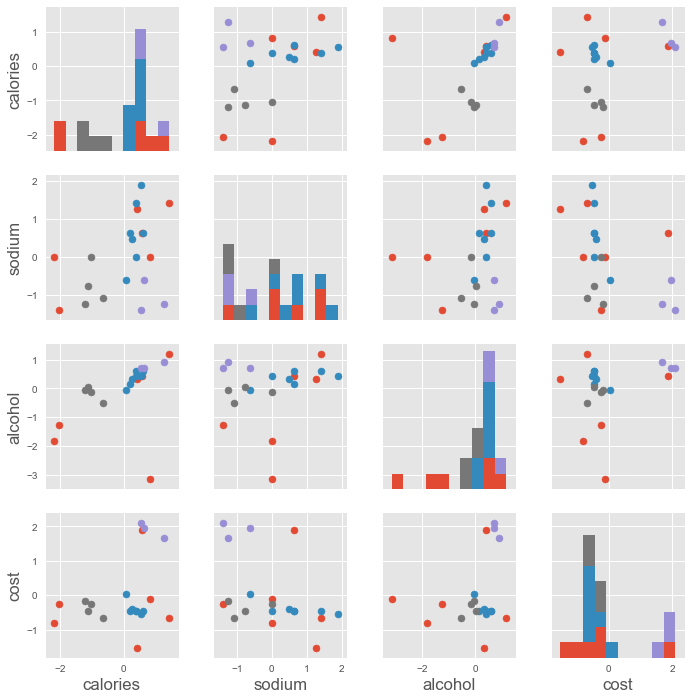

In [81]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
### super good example (try later)
### https://plot.ly/scikit-learn/plot-dbscan/

print (dbscanX)

g = sns.PairGrid(dbscanX, vars=["calories", "sodium" , "alcohol", "cost"], hue="labels")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

    

